In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [187]:
arquivo = 'kc_house_data.csv'
dataset = pd.read_csv(arquivo, sep=',' ,header=0)
print(F"Estrutura do dataset: {dataset.shape}\nColunas do dataset: {dataset.columns}")

Estrutura do dataset: (21613, 21)
Colunas do dataset: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


#### Colunas a serem descartadas

In [188]:
descartar_colunas = ['id', 'date', 'zipcode', 'lat', 'long']

dataset.drop(descartar_colunas, axis=1, inplace=True)

#### Há amostras com dados faltantes? Eliminamos essas amostras

In [189]:
#dataset['floors'].isnull().sum()
#dataset['bedrooms'].isnull().sum()

#Guarda as amostras que possuem valores faltantes
amostras_faltantes = dataset[dataset['floors'].isnull() | dataset['bedrooms'].isnull()]

print(F"Amostras faltantes: {amostras_faltantes.shape}\nAmostras restantes: {dataset.shape}")

#Remove as amostras que possuem valores faltantes
dataset = dataset.dropna(subset=['bedrooms', 'floors'])

print(F"Remoção das amostras incompletas: {dataset.shape}")

Amostras faltantes: (5, 16)
Amostras restantes: (21613, 16)
Remoção das amostras incompletas: (21608, 16)


#### Tipos de dados das colunas

In [190]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21608 non-null  float64
 1   bedrooms       21608 non-null  float64
 2   bathrooms      21608 non-null  float64
 3   sqft_living    21608 non-null  int64  
 4   sqft_lot       21608 non-null  int64  
 5   floors         21608 non-null  float64
 6   waterfront     21608 non-null  int64  
 7   view           21608 non-null  int64  
 8   condition      21608 non-null  int64  
 9   grade          21608 non-null  int64  
 10  sqft_above     21608 non-null  int64  
 11  sqft_basement  21608 non-null  int64  
 12  yr_built       21608 non-null  int64  
 13  yr_renovated   21608 non-null  int64  
 14  sqft_living15  21608 non-null  int64  
 15  sqft_lot15     21608 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.8 MB


#### Quantidade de valores únicos em cada coluna

In [191]:
#Quantidade de valores unicos em cada coluna
print(F"Valores únicos em cada coluna:\n{dataset.nunique()}")

Valores únicos em cada coluna:
price            4027
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
sqft_living15     775
sqft_lot15       8689
dtype: int64


#### Nome das colunas inteiras e a quantidade de valores únicos em cada uma

In [192]:
colunas_int = dataset.select_dtypes(include=['int64']).columns.to_list()
print(F"Colunas Inteiras: {colunas_int}")

qtd_valores_colunas_int = dataset[colunas_int].nunique()
#print(qtd_valores_colunas_int)
#Usar [x] para acessar o valor

colunas_float = dataset.select_dtypes(include=['float64']).columns.to_list()
qtd_valores_colunas_float = dataset[colunas_float].nunique()
print(F"Colunas Decimais: {colunas_float}")

#print(len(qtd_valores_colunas_int) + len(qtd_valores_colunas_float))

Colunas Inteiras: ['sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
Colunas Decimais: ['price', 'bedrooms', 'bathrooms', 'floors']


#### Histogramas

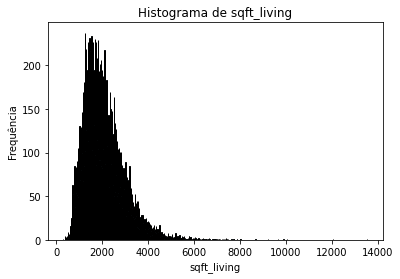

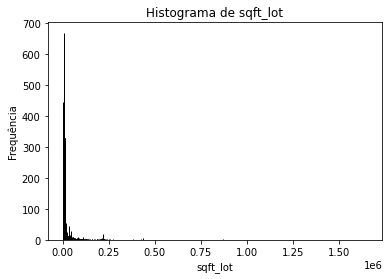

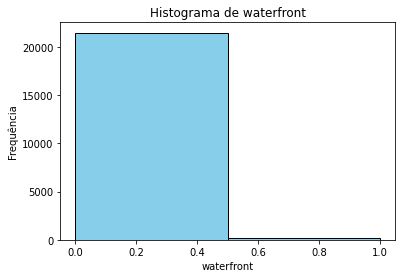

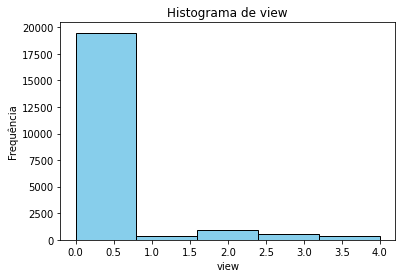

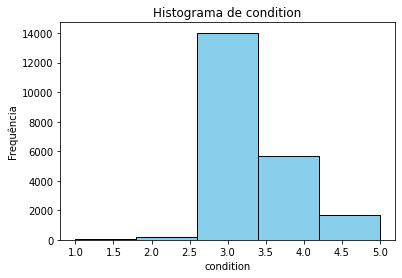

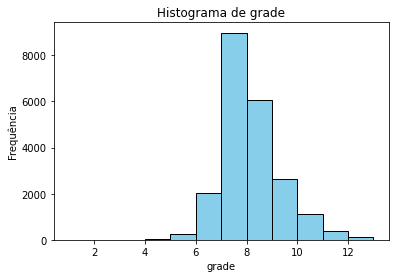

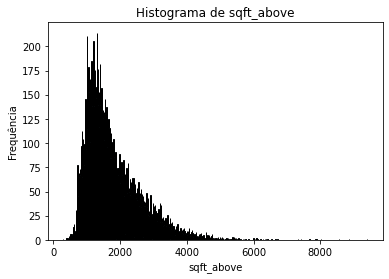

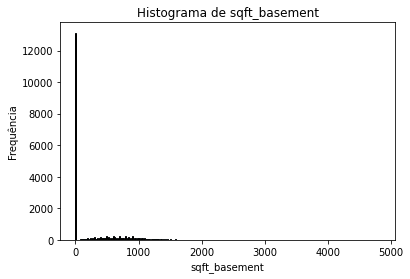

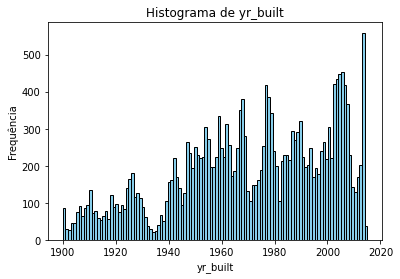

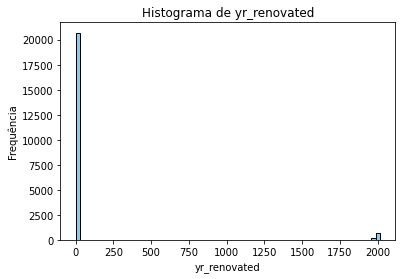

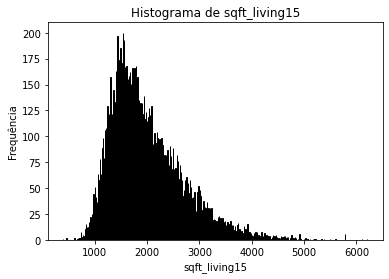

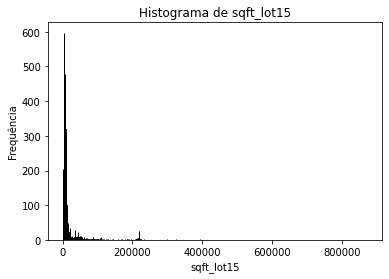

In [193]:
#Colunas inteiras
for coluna in range(len(colunas_int)):
    plt.hist(dataset[colunas_int[coluna]], bins=qtd_valores_colunas_int[coluna], color='skyblue', edgecolor='black')
    plt.xlabel(colunas_int[coluna])
    plt.ylabel('Frequência')
    plt.title(F'Histograma de {colunas_int[coluna]}')
    plt.show()


In [194]:
qtd_partes = 10
maior_preco = max(dataset['price'])
preco_inicial = 0.0
x_labels = []
x_labels.append(preco_inicial)

for preco in range(qtd_partes):
    preco_inicial += maior_preco/qtd_partes
    x_labels.append(preco_inicial)

x_labels


[0.0,
 770000.0,
 1540000.0,
 2310000.0,
 3080000.0,
 3850000.0,
 4620000.0,
 5390000.0,
 6160000.0,
 6930000.0,
 7700000.0]

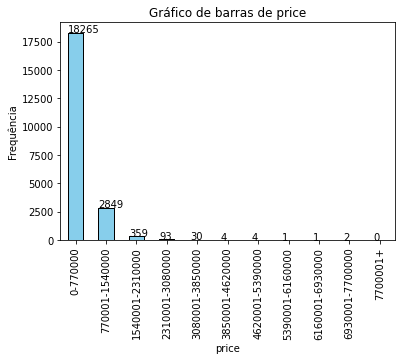

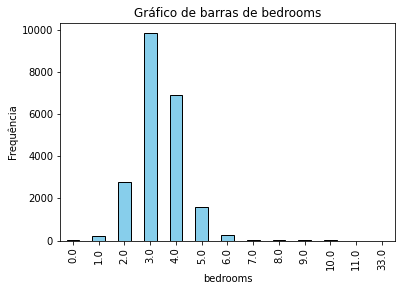

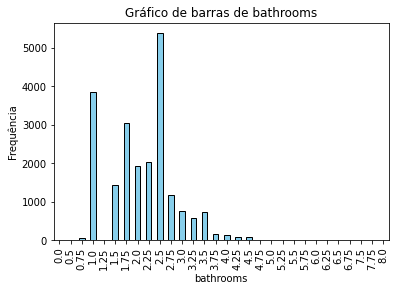

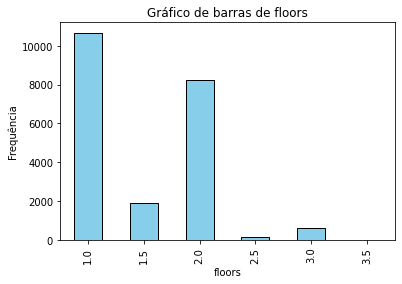

In [195]:
bins = [0, 770000, 1540000, 2310000, 3080000, 3850000, 4620000, 5390000, 6160000, 6930000, 7700000, np.inf]
labels = ['0-770000', '770001-1540000', '1540001-2310000', '2310001-3080000', '3080001-3850000','3850001-4620000','4620001-5390000','5390001-6160000','6160001-6930000','6930001-7700000', '7700001+']

for coluna in range(len(colunas_float)):
    if colunas_float[coluna] == 'price':
        dataset['price_group'] = pd.cut(dataset['price'], bins=bins, labels=labels)
        value_counts = dataset['price_group'].value_counts().sort_index()
        ax = value_counts.plot.bar(color='skyblue', edgecolor='black')
    
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    else:
        value_counts = dataset[colunas_float[coluna]].value_counts().sort_index()

    #Para ver os valores em todos os gráficos
    #ax = value_counts.plot.bar(color='skyblue', edgecolor='black')
    #for p in ax.patches:
        #ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    value_counts.plot.bar(color='skyblue', edgecolor='black')
    plt.xlabel(colunas_float[coluna])
    plt.ylabel('Frequência')
    plt.title(F'Gráfico de barras de {colunas_float[coluna]}')
    plt.show()

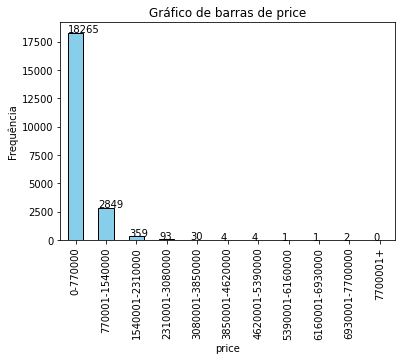

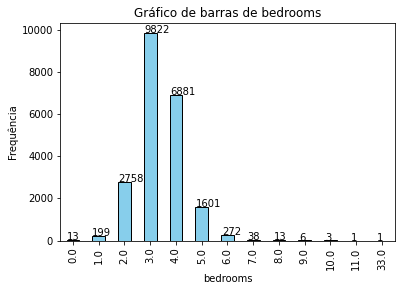

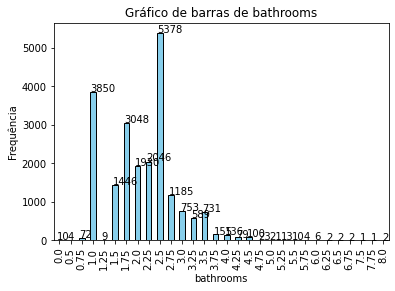

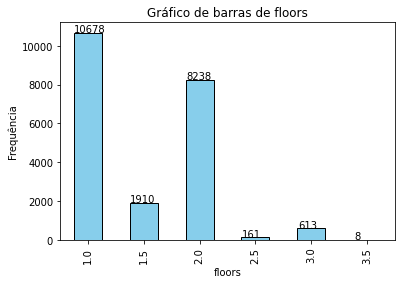

In [196]:
for coluna in range(len(colunas_float)):
    if colunas_float[coluna] == 'price':
        dataset['price_group'] = pd.cut(dataset['price'], bins=bins, labels=labels)
        value_counts = dataset['price_group'].value_counts().sort_index()
    else:
        value_counts = dataset[colunas_float[coluna]].value_counts().sort_index()
    
    ax = value_counts.plot.bar(color='skyblue', edgecolor='black')
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    plt.xlabel(colunas_float[coluna])
    plt.ylabel('Frequência')
    plt.title(F'Gráfico de barras de {colunas_float[coluna]}')
    plt.show()

In [197]:
dataset.drop('price_group', axis=1, inplace=True)  

In [198]:
correlation_matrix = dataset.corr()
print(correlation_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308323   0.525191     0.702060  0.089630  0.256885   
bedrooms       0.308323  1.000000   0.515881     0.576653  0.031671  0.175440   
bathrooms      0.525191  0.515881   1.000000     0.754642  0.087739  0.500584   
sqft_living    0.702060  0.576653   0.754642     1.000000  0.172818  0.353914   
sqft_lot       0.089630  0.031671   0.087739     0.172818  1.000000 -0.005182   
floors         0.256885  0.175440   0.500584     0.353914 -0.005182  1.000000   
waterfront     0.266372 -0.006596   0.063744     0.103816  0.021599  0.023705   
view           0.397274  0.079499   0.187735     0.284602  0.074694  0.029461   
condition      0.036347  0.028598  -0.124963    -0.058715 -0.008956 -0.263785   
grade          0.667424  0.356954   0.664980     0.762691  0.113602  0.458212   
sqft_above     0.605628  0.477579   0.685298     0.876590  0.183520  0.523839   
sqft_basement  0.323753  0.3

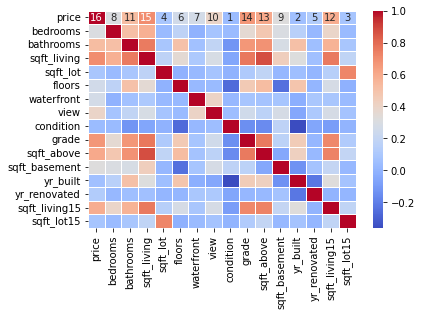

In [199]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=correlation_matrix.rank(axis="columns"), fmt=".0f", cmap='coolwarm',linewidth=1)
#annot=True
#annot=correlation_matrix.rank(axis="columns")
#fmt=".0f"

plt.show()

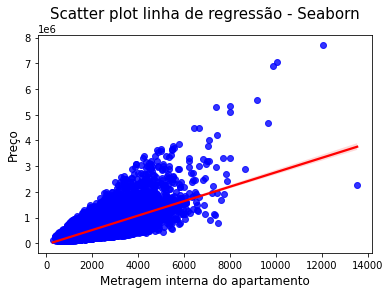

<Figure size 720x432 with 0 Axes>

In [200]:
sns.regplot(x='sqft_living', y='price', data=dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Set the labels and title
plt.xlabel('Metragem interna do apartamento', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.title('Scatter plot linha de regressão - Seaborn', fontsize=15)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Display the plot
plt.show()

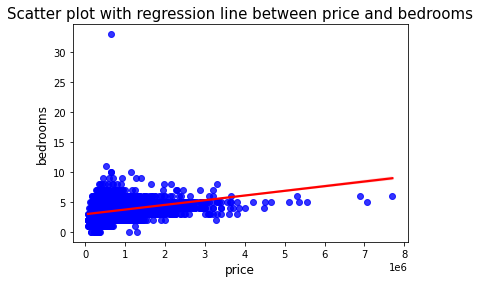

<Figure size 720x432 with 0 Axes>

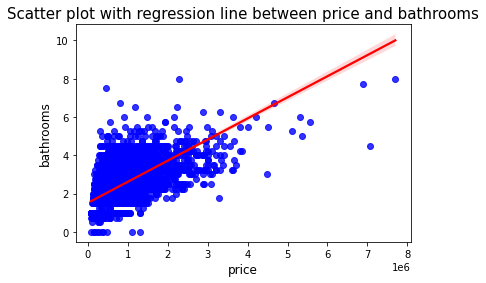

<Figure size 720x432 with 0 Axes>

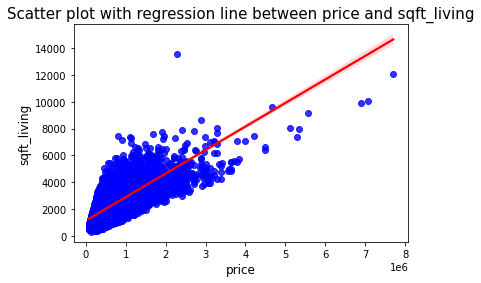

<Figure size 720x432 with 0 Axes>

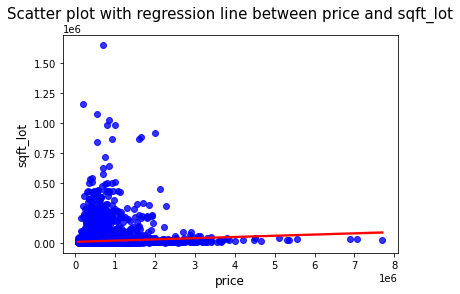

<Figure size 720x432 with 0 Axes>

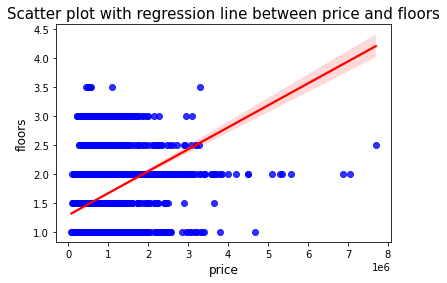

<Figure size 720x432 with 0 Axes>

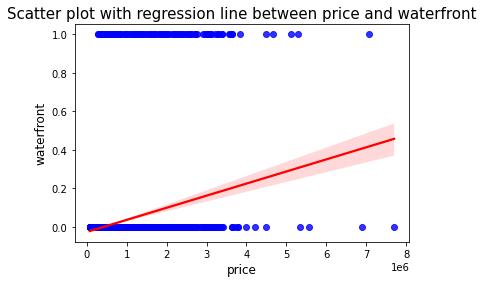

<Figure size 720x432 with 0 Axes>

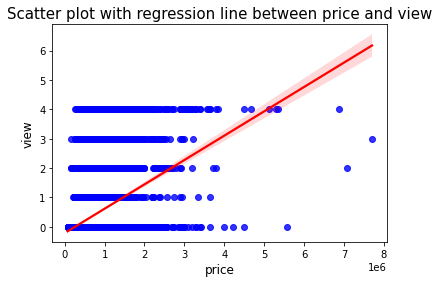

<Figure size 720x432 with 0 Axes>

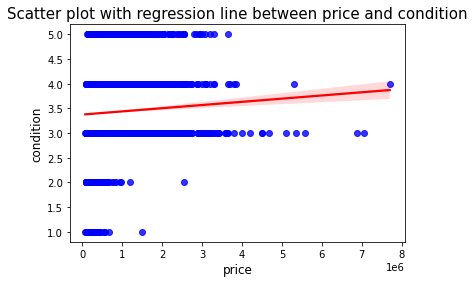

<Figure size 720x432 with 0 Axes>

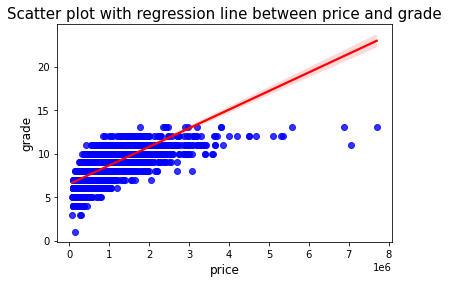

<Figure size 720x432 with 0 Axes>

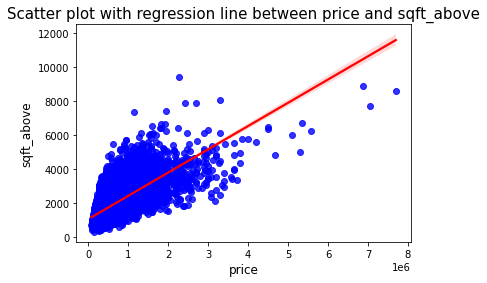

<Figure size 720x432 with 0 Axes>

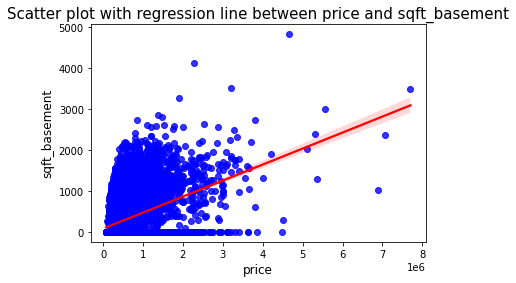

<Figure size 720x432 with 0 Axes>

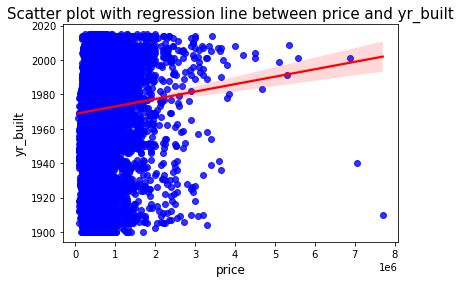

<Figure size 720x432 with 0 Axes>

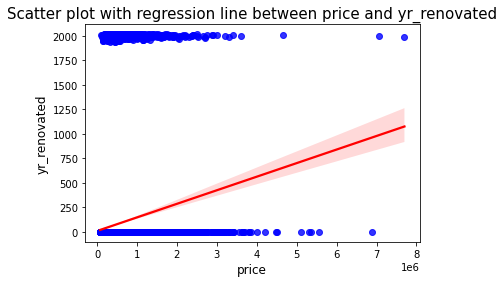

<Figure size 720x432 with 0 Axes>

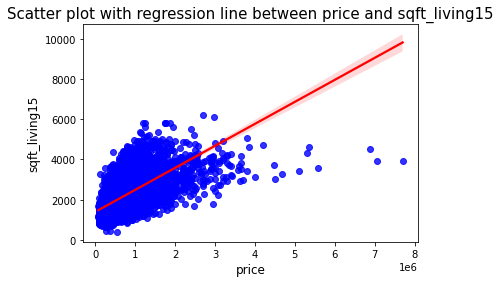

<Figure size 720x432 with 0 Axes>

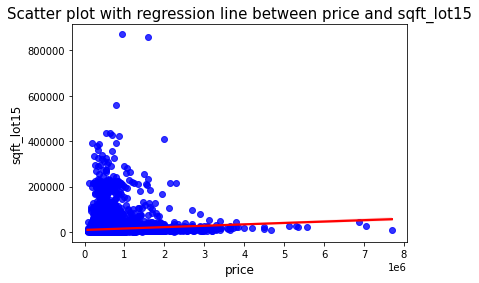

<Figure size 720x432 with 0 Axes>

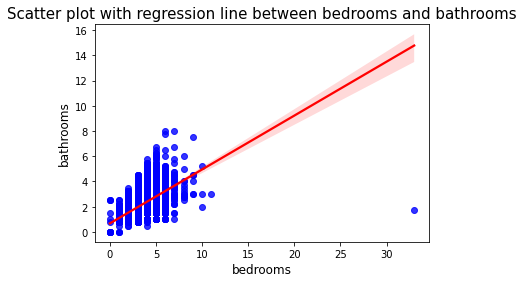

<Figure size 720x432 with 0 Axes>

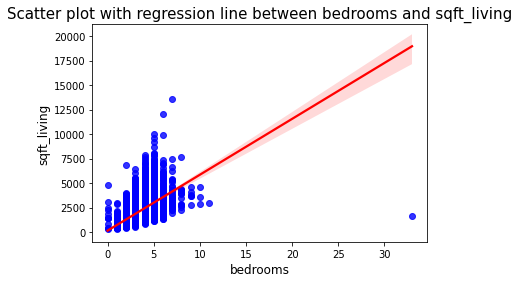

<Figure size 720x432 with 0 Axes>

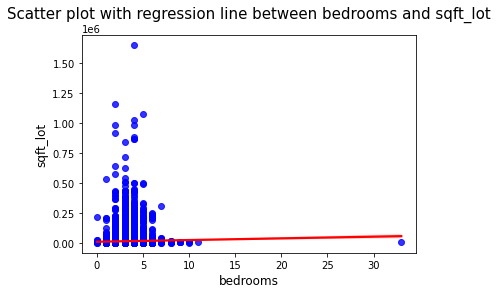

<Figure size 720x432 with 0 Axes>

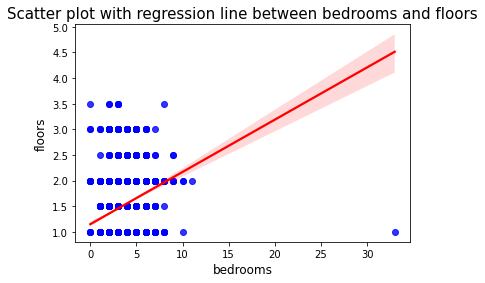

<Figure size 720x432 with 0 Axes>

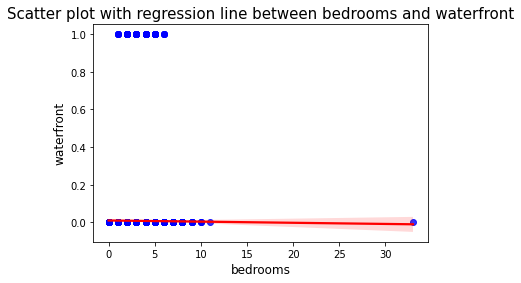

<Figure size 720x432 with 0 Axes>

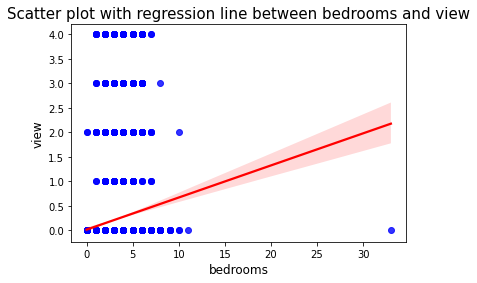

<Figure size 720x432 with 0 Axes>

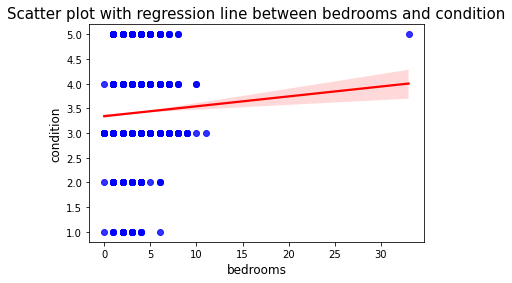

<Figure size 720x432 with 0 Axes>

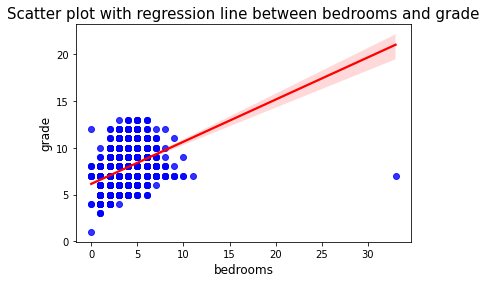

<Figure size 720x432 with 0 Axes>

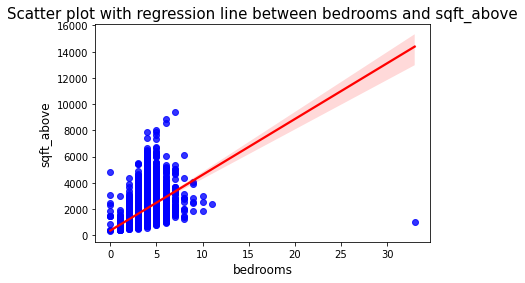

<Figure size 720x432 with 0 Axes>

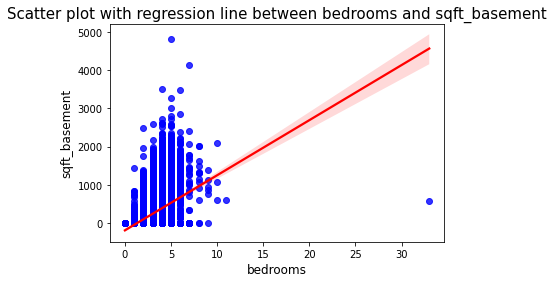

<Figure size 720x432 with 0 Axes>

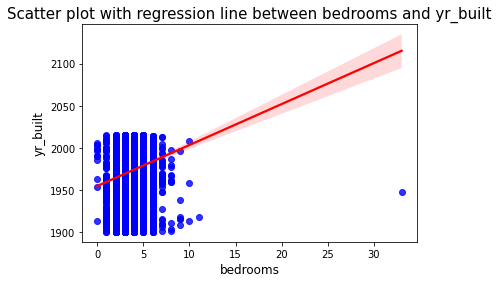

<Figure size 720x432 with 0 Axes>

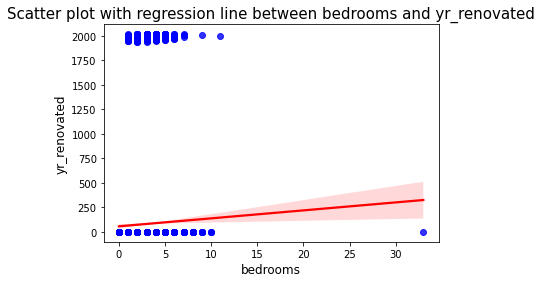

<Figure size 720x432 with 0 Axes>

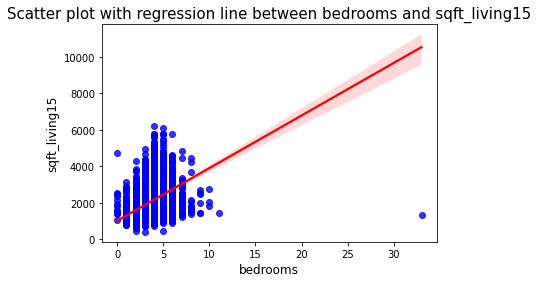

<Figure size 720x432 with 0 Axes>

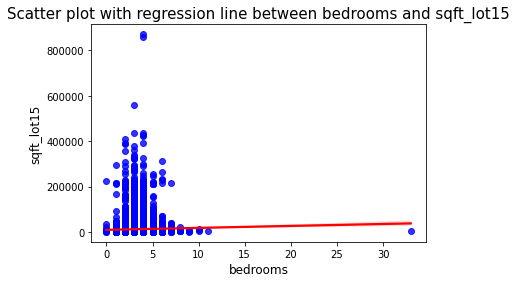

<Figure size 720x432 with 0 Axes>

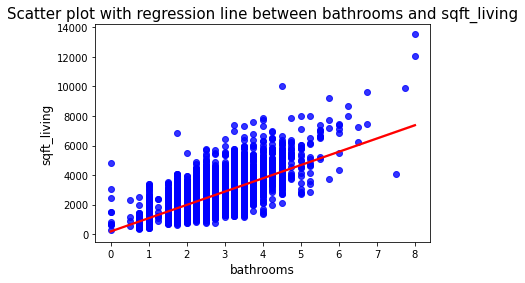

<Figure size 720x432 with 0 Axes>

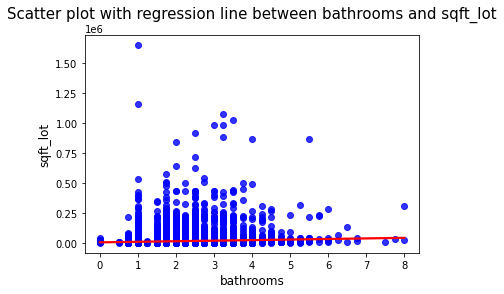

<Figure size 720x432 with 0 Axes>

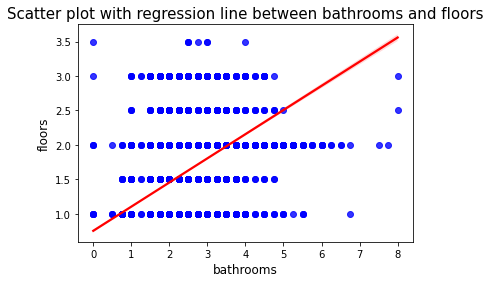

<Figure size 720x432 with 0 Axes>

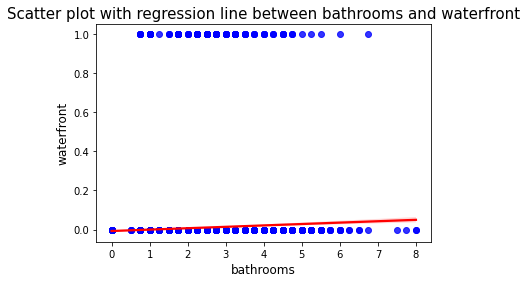

<Figure size 720x432 with 0 Axes>

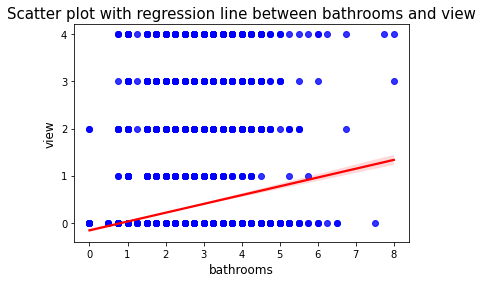

<Figure size 720x432 with 0 Axes>

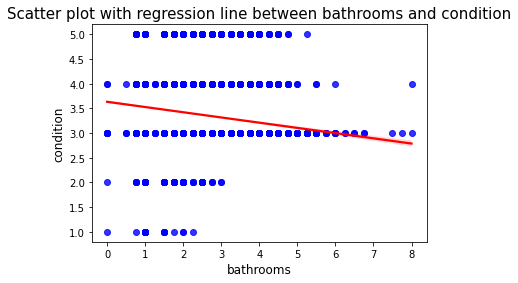

<Figure size 720x432 with 0 Axes>

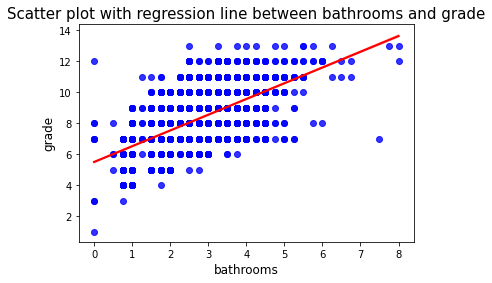

<Figure size 720x432 with 0 Axes>

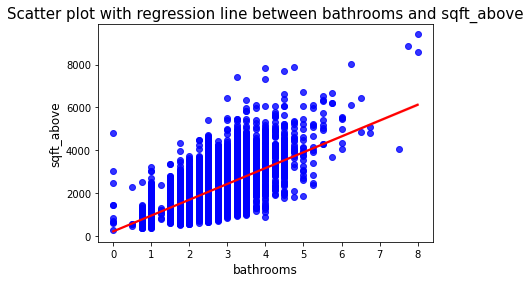

<Figure size 720x432 with 0 Axes>

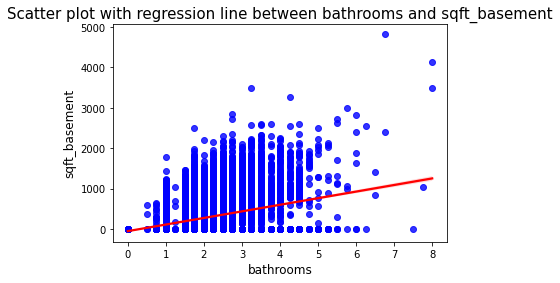

<Figure size 720x432 with 0 Axes>

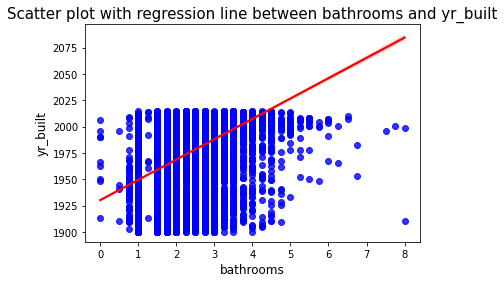

<Figure size 720x432 with 0 Axes>

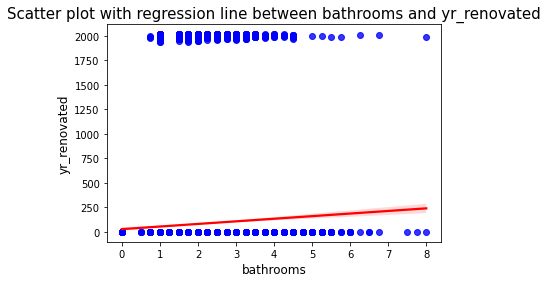

<Figure size 720x432 with 0 Axes>

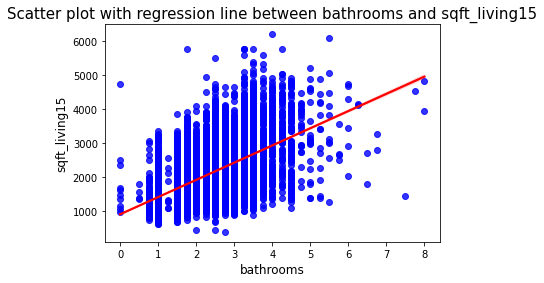

<Figure size 720x432 with 0 Axes>

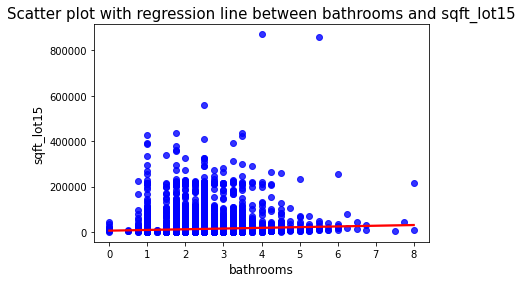

<Figure size 720x432 with 0 Axes>

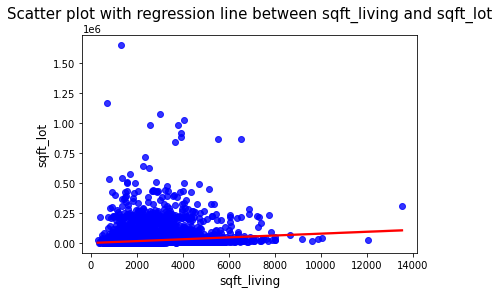

<Figure size 720x432 with 0 Axes>

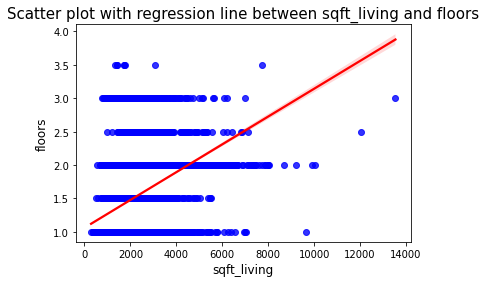

<Figure size 720x432 with 0 Axes>

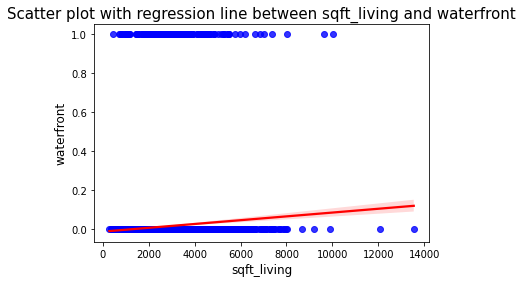

<Figure size 720x432 with 0 Axes>

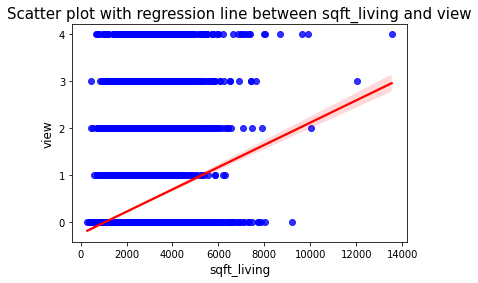

<Figure size 720x432 with 0 Axes>

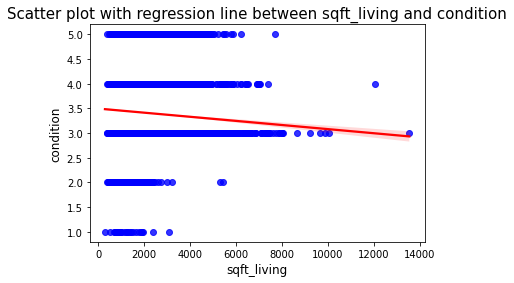

<Figure size 720x432 with 0 Axes>

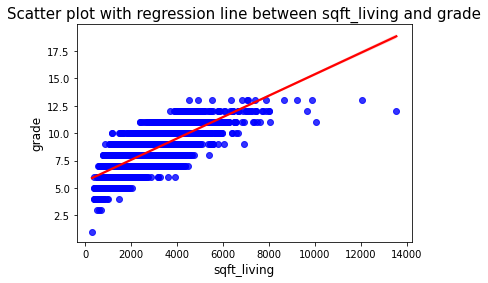

<Figure size 720x432 with 0 Axes>

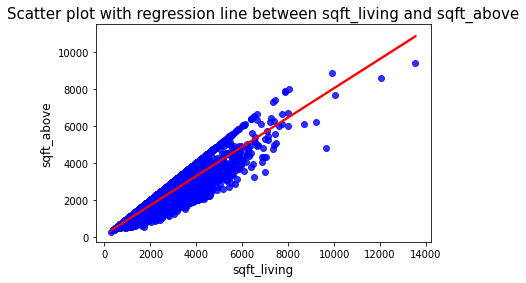

<Figure size 720x432 with 0 Axes>

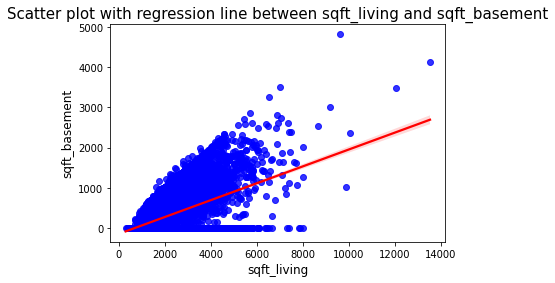

<Figure size 720x432 with 0 Axes>

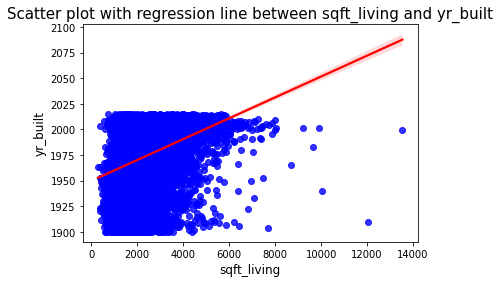

<Figure size 720x432 with 0 Axes>

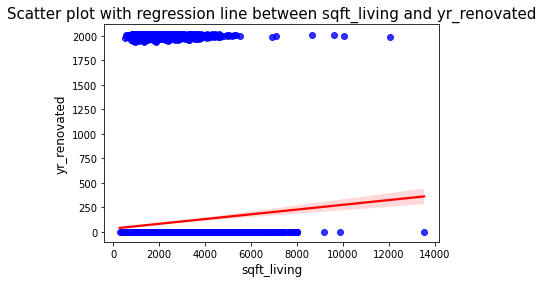

<Figure size 720x432 with 0 Axes>

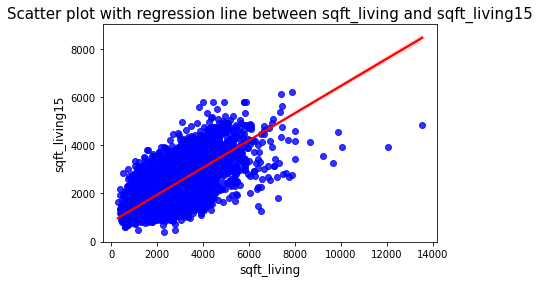

<Figure size 720x432 with 0 Axes>

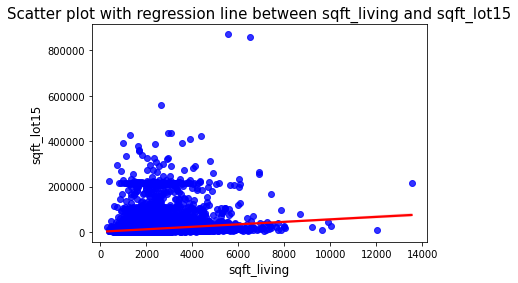

<Figure size 720x432 with 0 Axes>

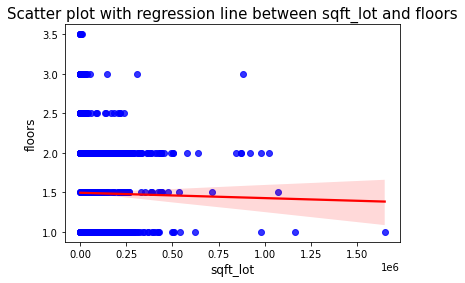

<Figure size 720x432 with 0 Axes>

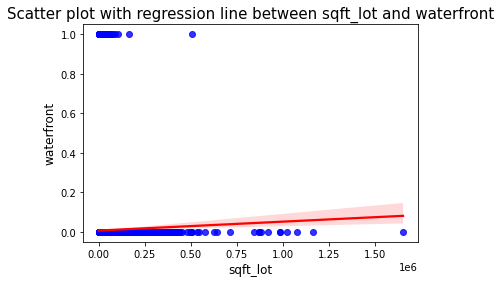

<Figure size 720x432 with 0 Axes>

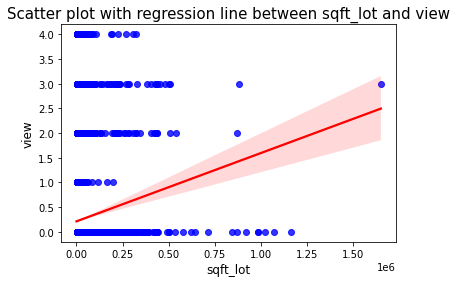

<Figure size 720x432 with 0 Axes>

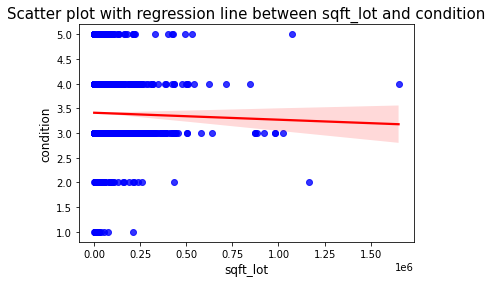

<Figure size 720x432 with 0 Axes>

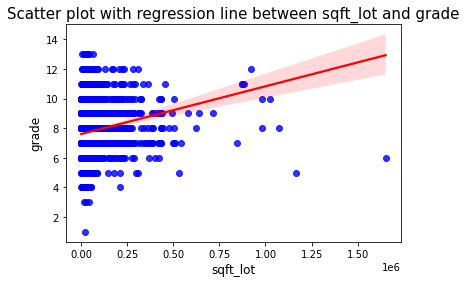

<Figure size 720x432 with 0 Axes>

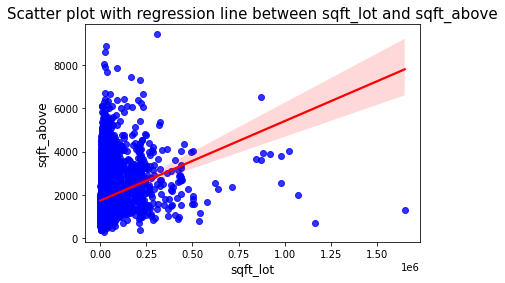

<Figure size 720x432 with 0 Axes>

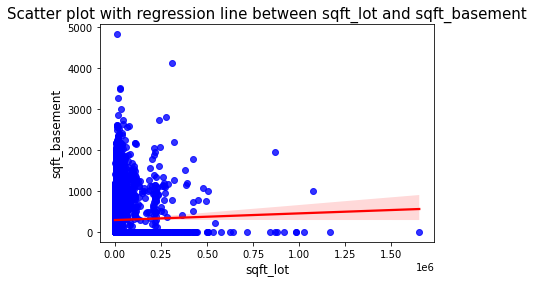

<Figure size 720x432 with 0 Axes>

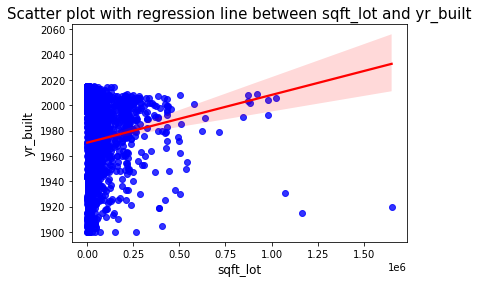

<Figure size 720x432 with 0 Axes>

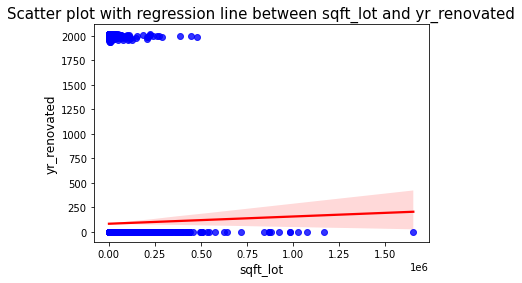

<Figure size 720x432 with 0 Axes>

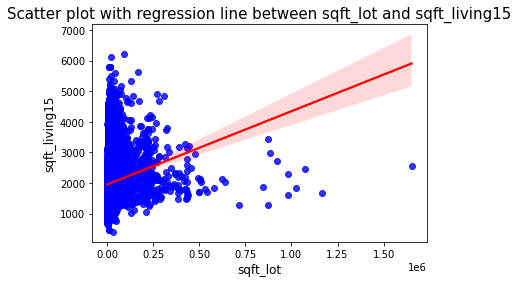

<Figure size 720x432 with 0 Axes>

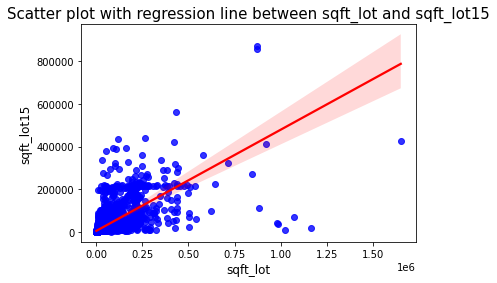

<Figure size 720x432 with 0 Axes>

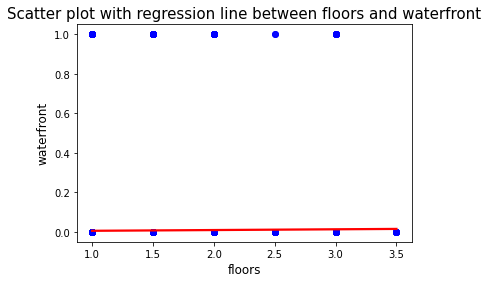

<Figure size 720x432 with 0 Axes>

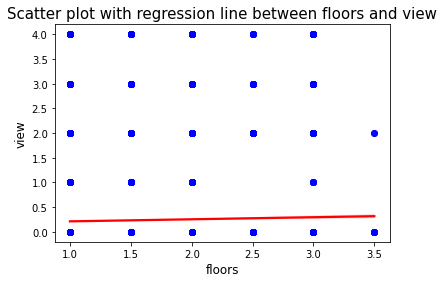

<Figure size 720x432 with 0 Axes>

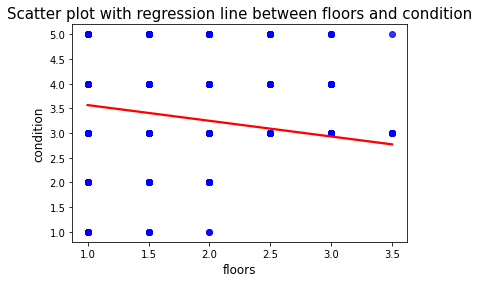

<Figure size 720x432 with 0 Axes>

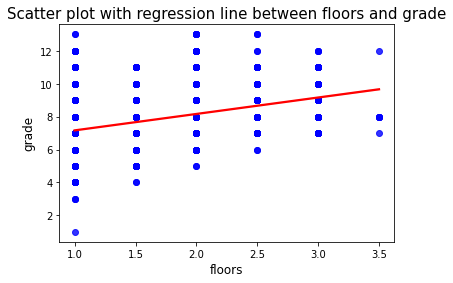

<Figure size 720x432 with 0 Axes>

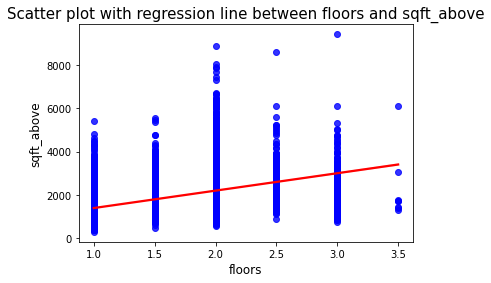

<Figure size 720x432 with 0 Axes>

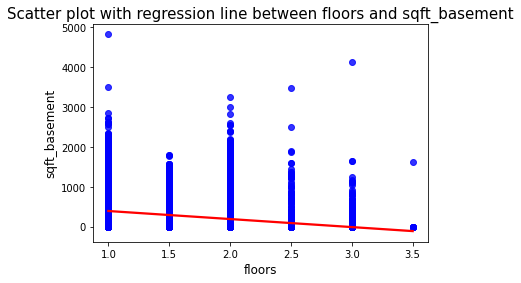

<Figure size 720x432 with 0 Axes>

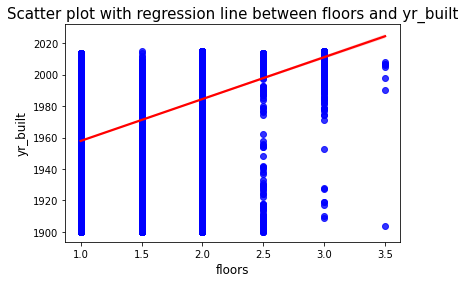

<Figure size 720x432 with 0 Axes>

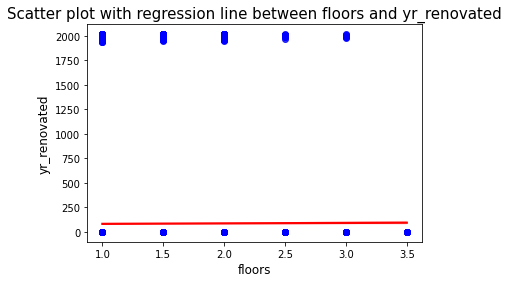

<Figure size 720x432 with 0 Axes>

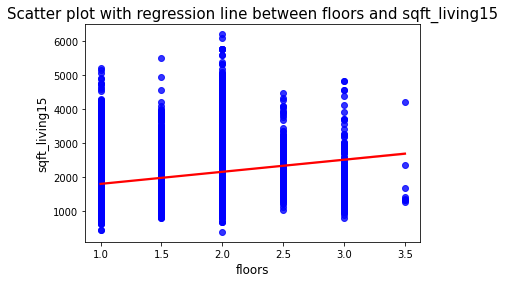

<Figure size 720x432 with 0 Axes>

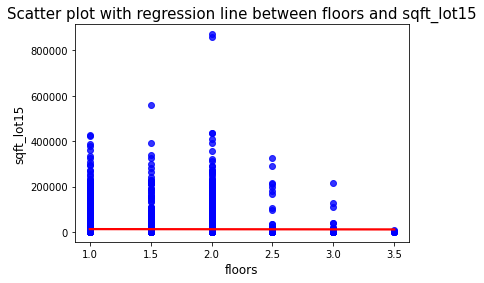

<Figure size 720x432 with 0 Axes>

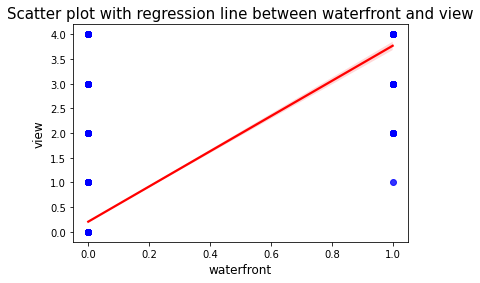

<Figure size 720x432 with 0 Axes>

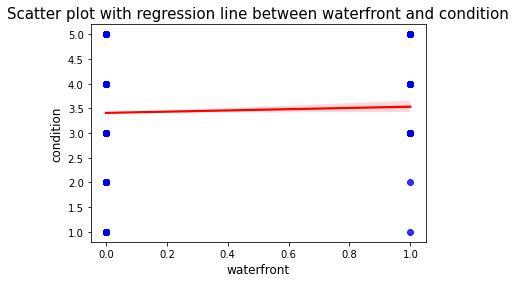

<Figure size 720x432 with 0 Axes>

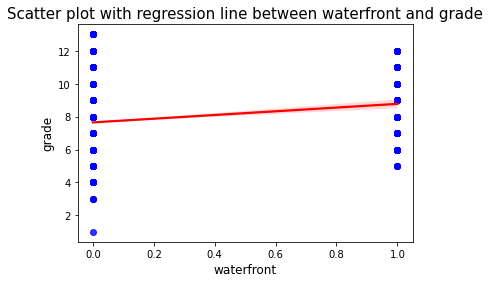

<Figure size 720x432 with 0 Axes>

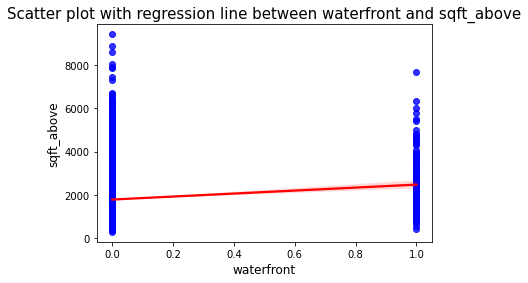

<Figure size 720x432 with 0 Axes>

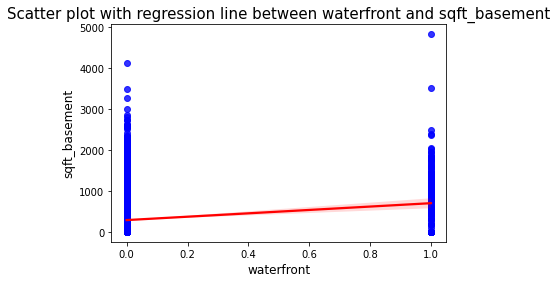

<Figure size 720x432 with 0 Axes>

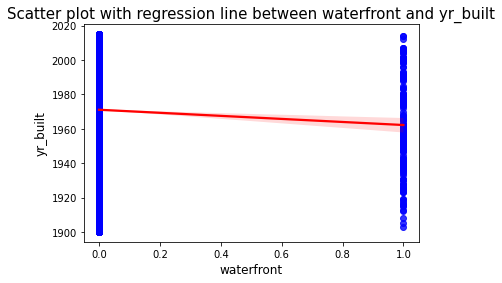

<Figure size 720x432 with 0 Axes>

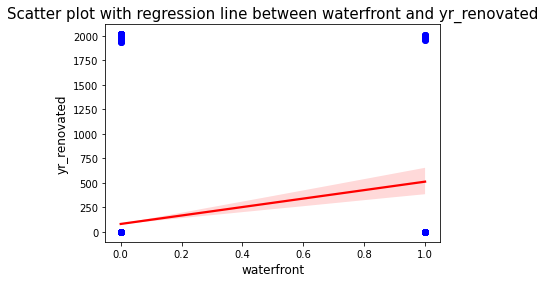

<Figure size 720x432 with 0 Axes>

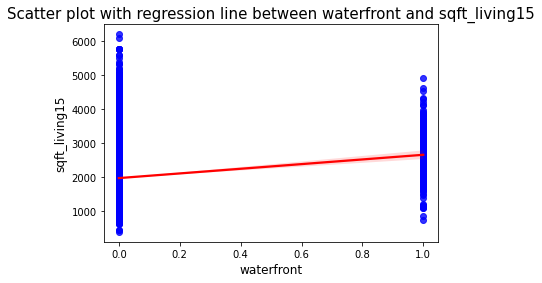

<Figure size 720x432 with 0 Axes>

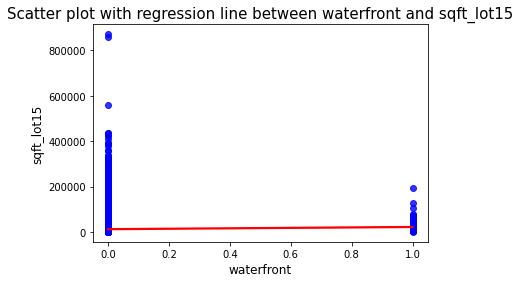

<Figure size 720x432 with 0 Axes>

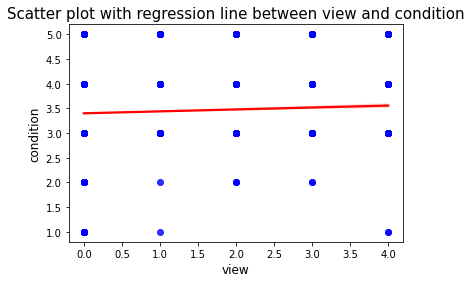

<Figure size 720x432 with 0 Axes>

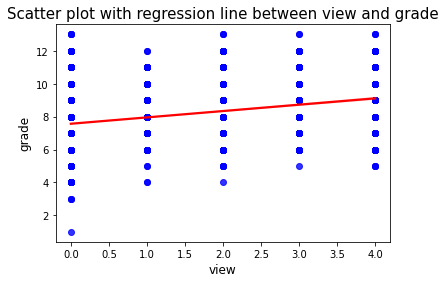

<Figure size 720x432 with 0 Axes>

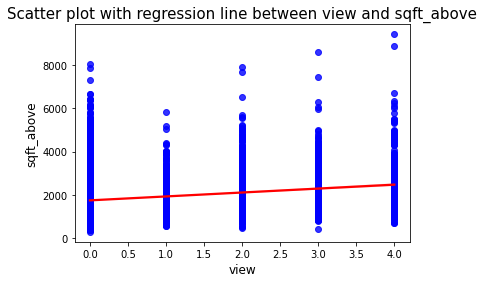

<Figure size 720x432 with 0 Axes>

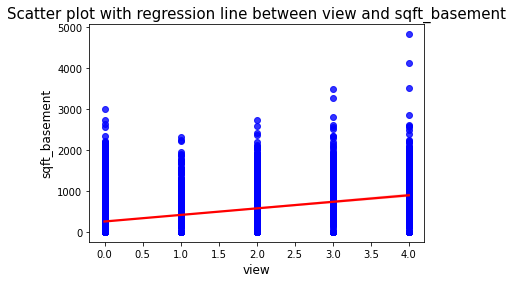

<Figure size 720x432 with 0 Axes>

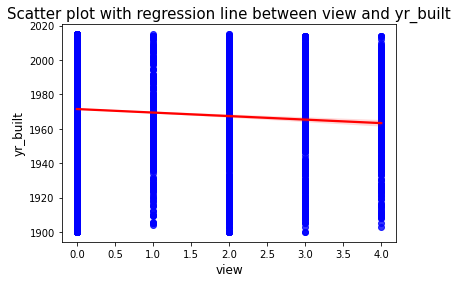

<Figure size 720x432 with 0 Axes>

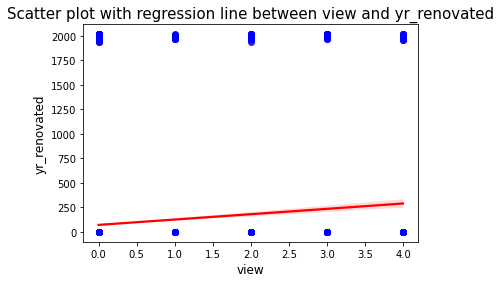

<Figure size 720x432 with 0 Axes>

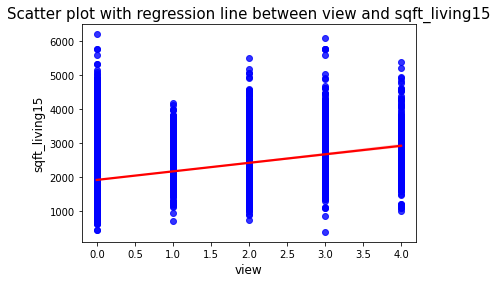

<Figure size 720x432 with 0 Axes>

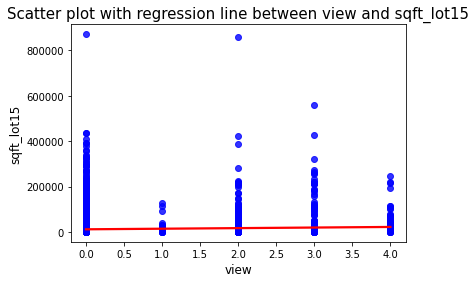

<Figure size 720x432 with 0 Axes>

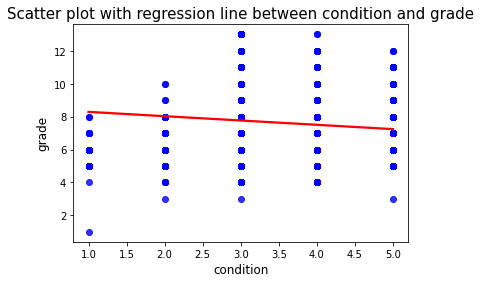

<Figure size 720x432 with 0 Axes>

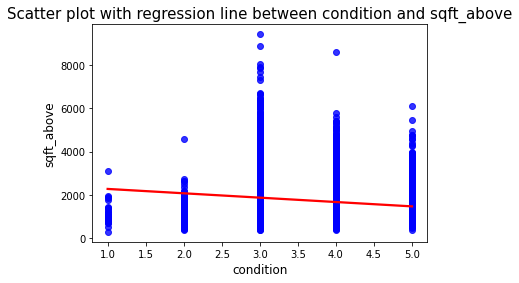

<Figure size 720x432 with 0 Axes>

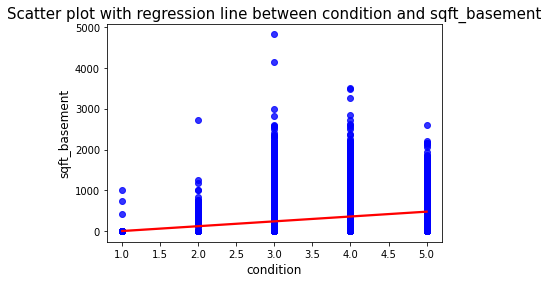

<Figure size 720x432 with 0 Axes>

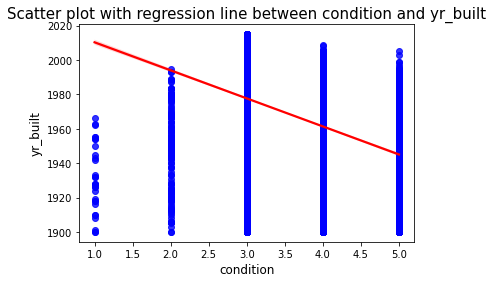

<Figure size 720x432 with 0 Axes>

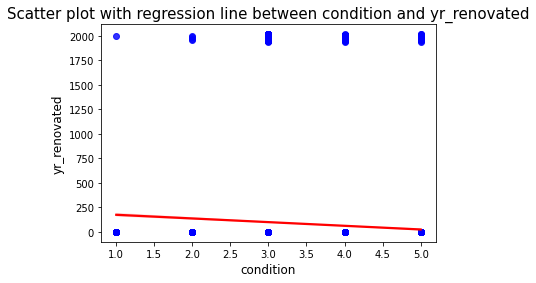

<Figure size 720x432 with 0 Axes>

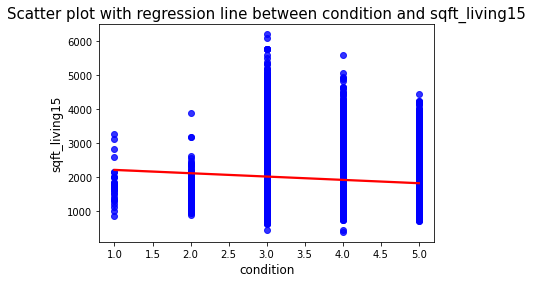

<Figure size 720x432 with 0 Axes>

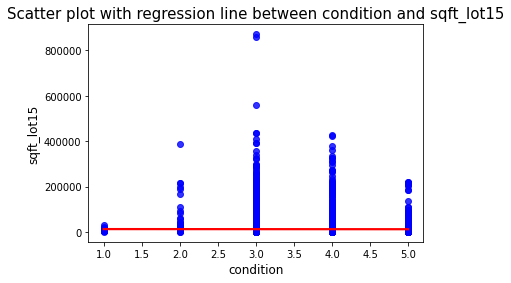

<Figure size 720x432 with 0 Axes>

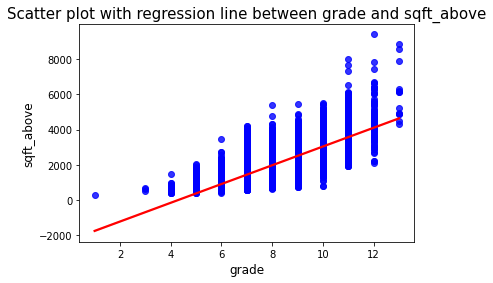

<Figure size 720x432 with 0 Axes>

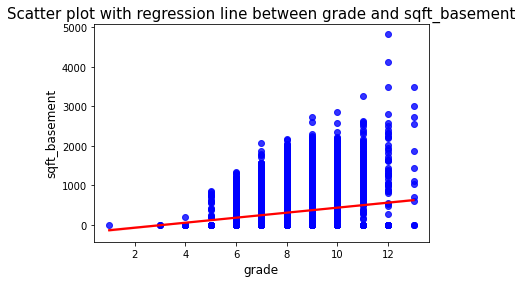

<Figure size 720x432 with 0 Axes>

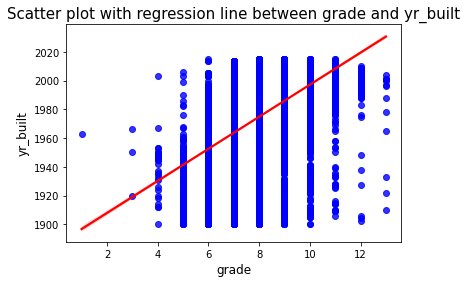

<Figure size 720x432 with 0 Axes>

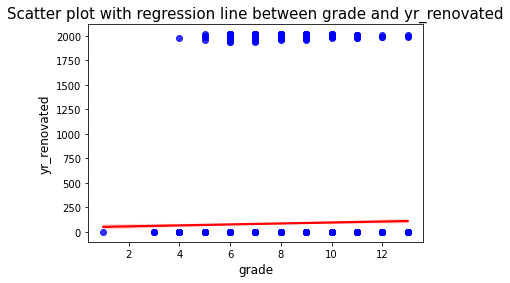

<Figure size 720x432 with 0 Axes>

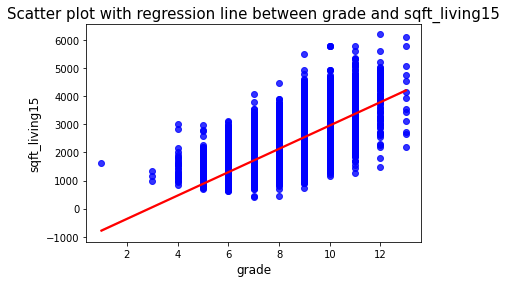

<Figure size 720x432 with 0 Axes>

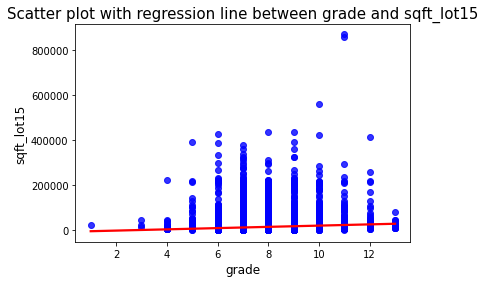

<Figure size 720x432 with 0 Axes>

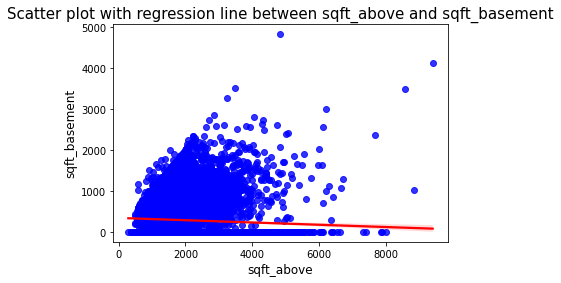

<Figure size 720x432 with 0 Axes>

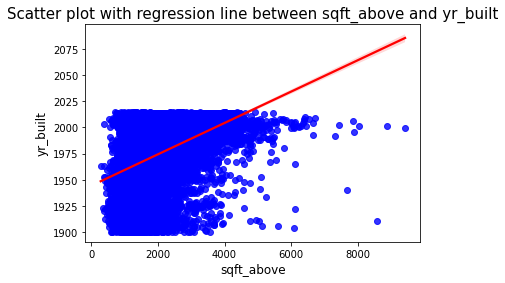

<Figure size 720x432 with 0 Axes>

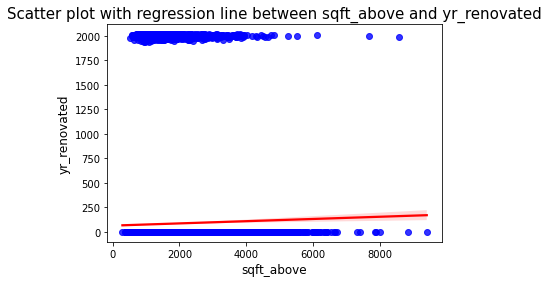

<Figure size 720x432 with 0 Axes>

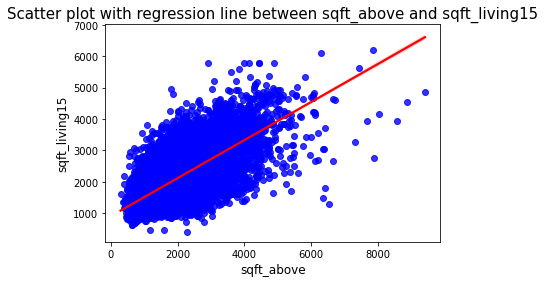

<Figure size 720x432 with 0 Axes>

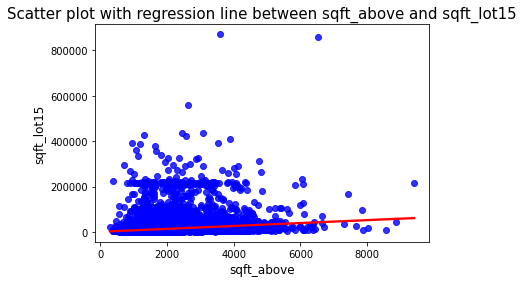

<Figure size 720x432 with 0 Axes>

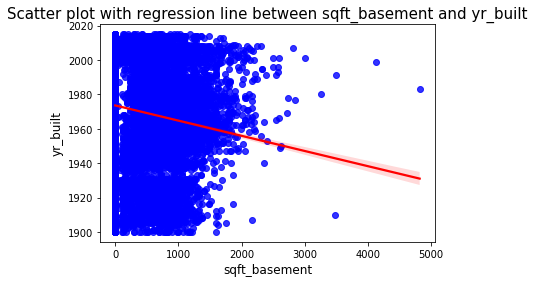

<Figure size 720x432 with 0 Axes>

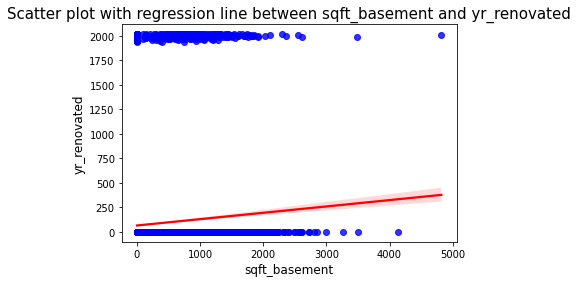

<Figure size 720x432 with 0 Axes>

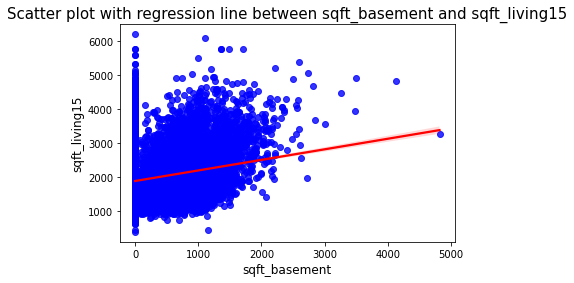

<Figure size 720x432 with 0 Axes>

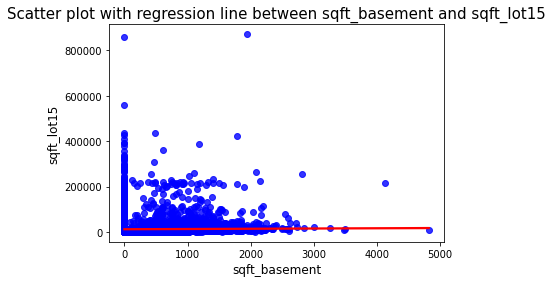

<Figure size 720x432 with 0 Axes>

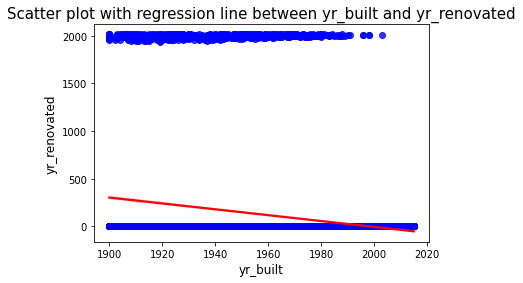

<Figure size 720x432 with 0 Axes>

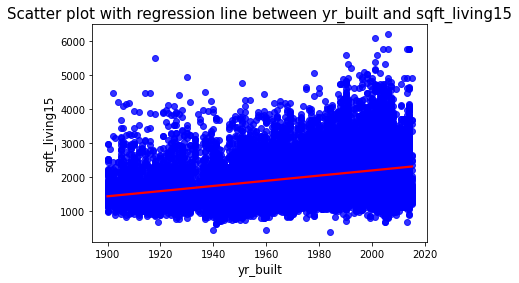

<Figure size 720x432 with 0 Axes>

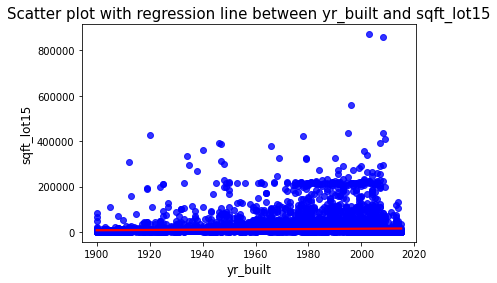

<Figure size 720x432 with 0 Axes>

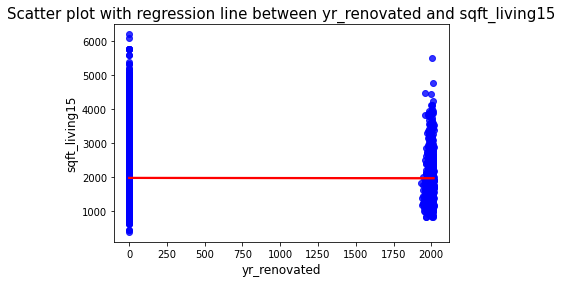

<Figure size 720x432 with 0 Axes>

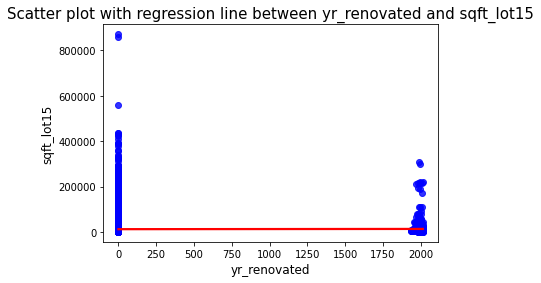

<Figure size 720x432 with 0 Axes>

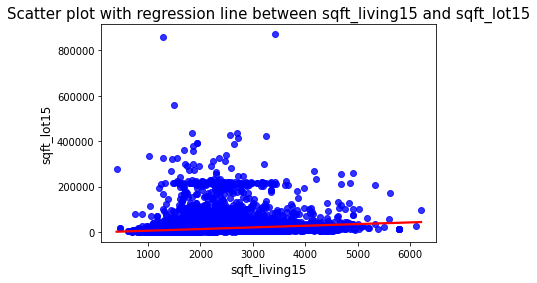

<Figure size 720x432 with 0 Axes>

In [201]:
executar = False
if executar:
    columns = dataset.columns

    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            
            sns.regplot(x=columns[i], y=columns[j], data=dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

            
            plt.xlabel(columns[i], fontsize=12)
            plt.ylabel(columns[j], fontsize=12)
            plt.title(f'Scatter plot with regression line between {columns[i]} and {columns[j]}', fontsize=15)

            
            plt.figure(figsize=(10, 6))
            plt.show()

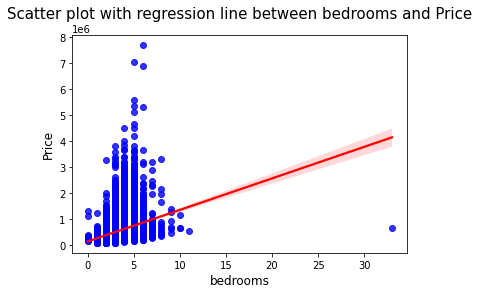

<Figure size 720x432 with 0 Axes>

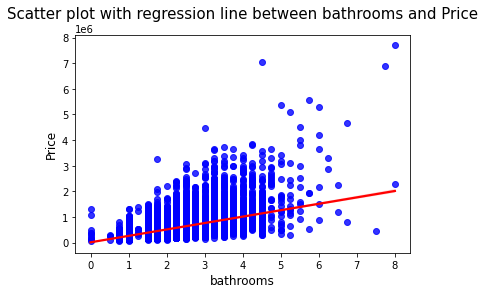

<Figure size 720x432 with 0 Axes>

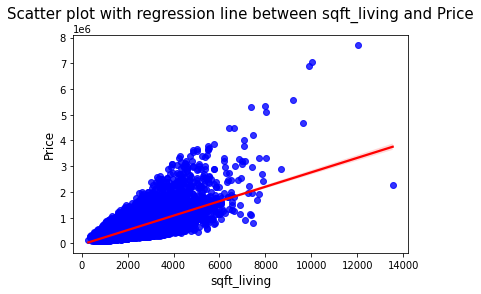

<Figure size 720x432 with 0 Axes>

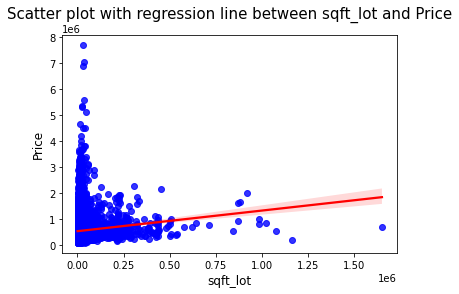

<Figure size 720x432 with 0 Axes>

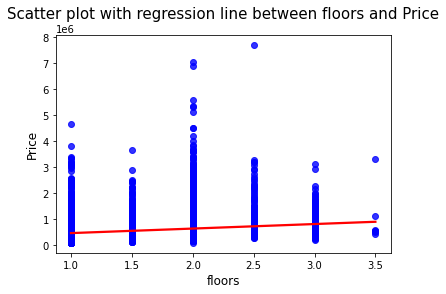

<Figure size 720x432 with 0 Axes>

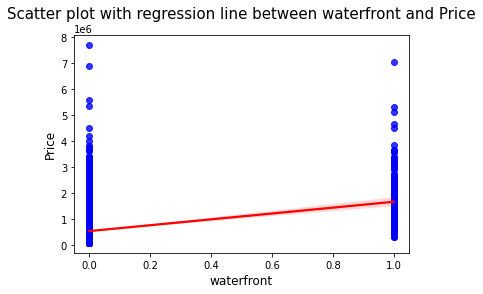

<Figure size 720x432 with 0 Axes>

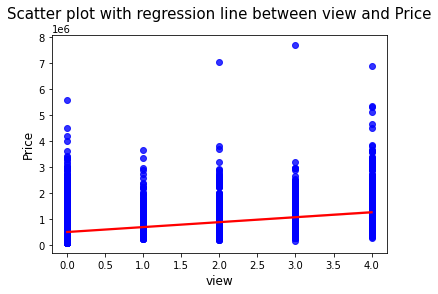

<Figure size 720x432 with 0 Axes>

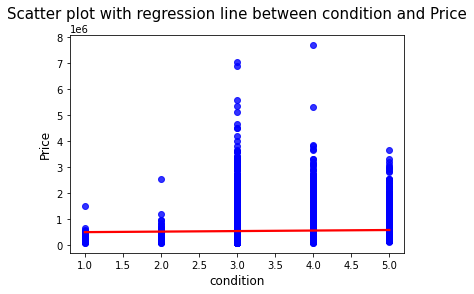

<Figure size 720x432 with 0 Axes>

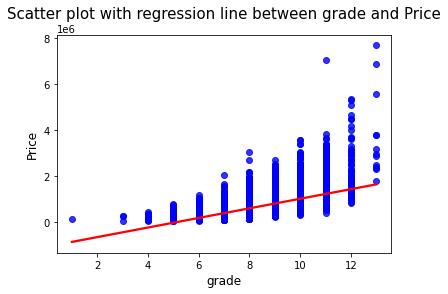

<Figure size 720x432 with 0 Axes>

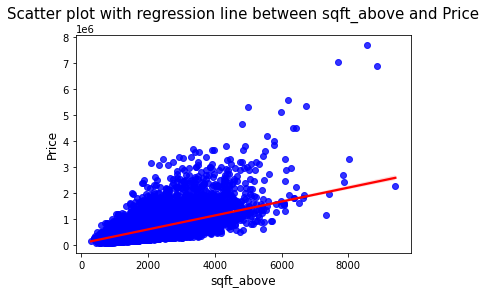

<Figure size 720x432 with 0 Axes>

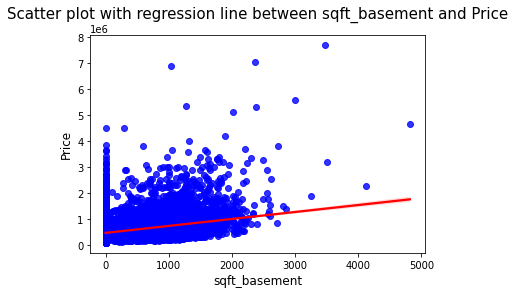

<Figure size 720x432 with 0 Axes>

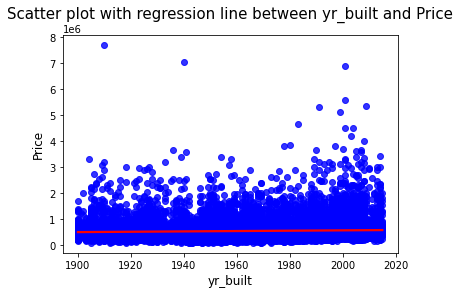

<Figure size 720x432 with 0 Axes>

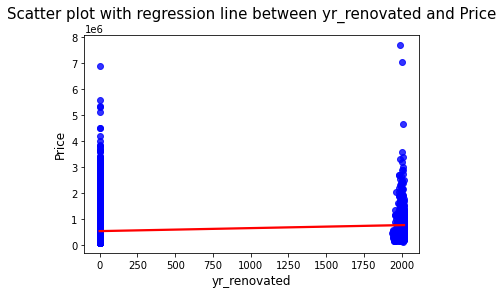

<Figure size 720x432 with 0 Axes>

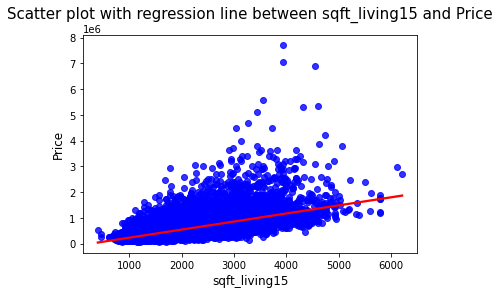

<Figure size 720x432 with 0 Axes>

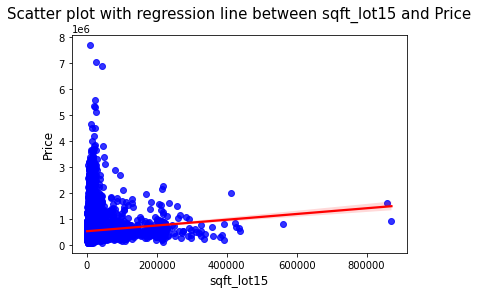

<Figure size 720x432 with 0 Axes>

In [204]:
#Relação de todas as colunas e o preço
executar = False
if executar:
    columns = dataset.columns

    for col in columns:
        if col != 'price':
            
            sns.regplot(x=col, y='price', data=dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

            plt.xlabel(col, fontsize=12)
            plt.ylabel('Price', fontsize=12)
            plt.title(f'Scatter plot with regression line between {col} and Price', fontsize=15)

            plt.figure(figsize=(10, 6))
            plt.show()